In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv

# # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

joblib is not installed. Falling back to sequential computation.


In [2]:
pdb = md.load_pdb('./1bna.pdb')
#res = pdb.atom_slice(pdb.top.select('resid 0 23'))
res = pdb.atom_slice(pdb.top.select('resid 1'))
view = nv.show_mdtraj(res)
view

NGLWidget()

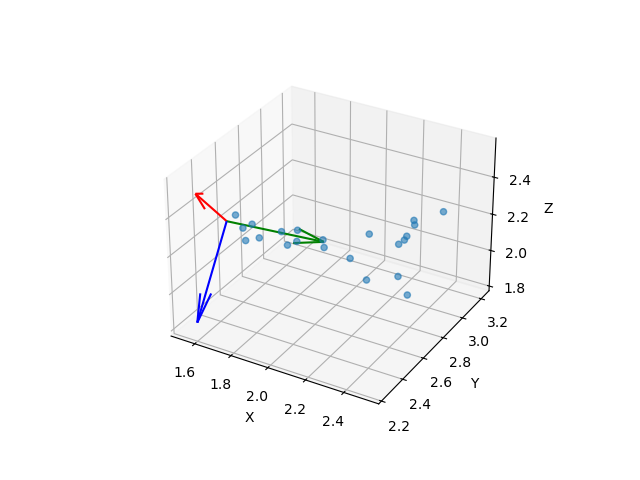

In [10]:
%matplotlib ipympl
ref = mdna.ReferenceBase(res)
ref.plot_baseframe(length=0.5)    

In [4]:
''.join(mdna.get_sequence_letters(pdb))


'CGCGAATTCGCG'

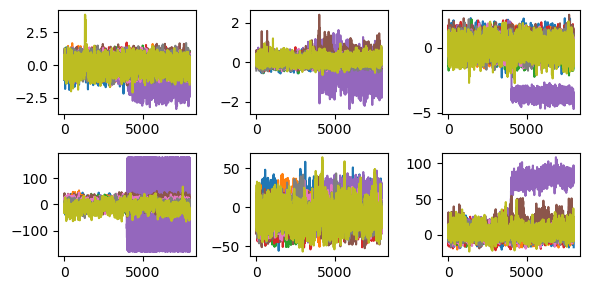
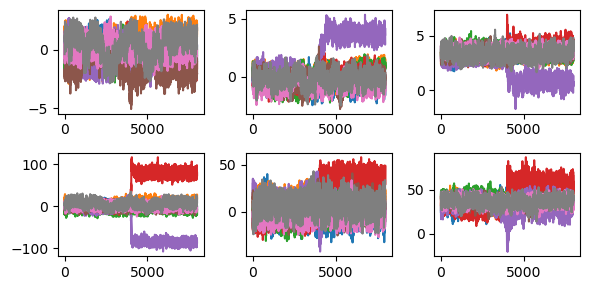

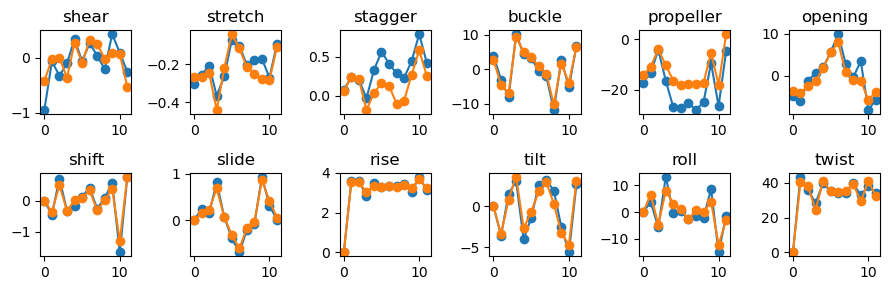

In [279]:
%matplotlib inline
pdb = md.load_pdb('./1bna.pdb')
nuc = mdna.NucleicFrames(pdb)

params, names = nuc.get_parameters()

ref = data = np.array([np.genfromtxt('./1bna_x3dna.dat', skip_header=2, usecols=range(1, 13))])

fig,ax = plt.subplots(2,6, figsize=[9,3])
ax = ax.flatten()
for _,name in enumerate(names):
    

    para = params[:,:,names.index(name)]
    ref_para = ref[:,:,names.index(name)]
    
    # if _ in [5,6,7,8,10,11]:
    #     ax[_].plot(np.mean(para, axis=0)[::-1],'-o')

    # elif _ == 9:
    #     ax[_].plot(-np.mean(para, axis=0)[::-1],'-o')
    # else:
    #     ax[_].plot(np.mean(para, axis=0),'-o')
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].plot(np.mean(ref_para, axis=0),'-o')
    ax[_].set_title(name)
    
fig.tight_layout()


In [282]:
ref[0][0],  params[:,:,names.index('shear')]

(array([ -0.422,  -0.268,   0.06 ,   2.762, -14.2  ,  -3.666,   0.   ,
          0.   ,   0.   ,   0.   ,   0.   ,   0.   ]),
 array([[-0.94722151, -0.06691637, -0.32768867, -0.10442198,  0.33936885,
         -0.06544358,  0.26056699,  0.0390986 , -0.20526139,  0.4264276 ,
          0.08866279, -0.25668819]]))

In [6]:
#list(nuc.frames.keys())[0].chain.index

(0.7328599035739898,
 2.7654400527477265,
 1.479309970140457,
 3.511890119314194,
 1.9243324652314184,
 3.448767577111721)

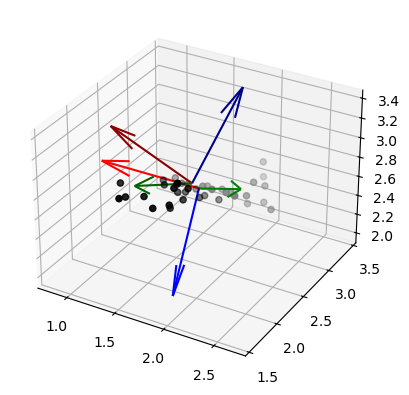

In [280]:
def plot_frame(frame,ax,colors=['r','g','b']):
    origin = frame[0]
   
    _ = 0
    for v in frame[1:]:
        ax.quiver(origin[0], origin[1], origin[2], v[0], v[1], v[2], color=colors[_],length=1)
        _ += 1

pdb = md.load_pdb('./1bna.pdb')
nuc = mdna.NucleicFrames(pdb)

# get the frames of residues A and B    
frames = nuc.frames
idx = 0
res_a,res_b = nuc.res_A[idx], nuc.res_B[idx]
frame_a, frame_b = frames[res_a][0], frames[res_b][0]


# plot boolean
residue_a = True
residue_b = True
frame_A = True
frame_B = True
other_atoms = False


# plot in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# plot residue A
if residue_a:
    indices = [atom.index for atom in res_a.atoms] 
    xyz = pdb.xyz[0][indices]
    ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='gray', marker='o')

# plot residue B
if residue_b:
    indices = [atom.index for atom in res_b.atoms]
    xyz = pdb.xyz[0][indices]
    ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c='black', marker='o')

# other atoms
if other_atoms:
    not_xyz = pdb.xyz[0][[atom.index for atom in pdb.top.atoms if atom.index not in indices]]
    ax.scatter(not_xyz[:,0], not_xyz[:,1], not_xyz[:,2], c='k', marker='o',alpha=1,s=0.5)

# plot frames
if frame_A:
    plot_frame(frame_a, ax, colors=['r','g','b'])
if frame_B:
    #frame_b[[1,2]] *= -1
    #frame_b[[2,3]] *= -1
    plot_frame(frame_b, ax, colors=['darkred','darkgreen','darkblue'])

ax.axis('equal')

In [281]:
frame_a, frame_b

(array([[ 1.7028706 ,  2.5605135 ,  2.65188   ],
        [-0.9985314 , -0.0465459 ,  0.0277216 ],
        [-0.05410076,  0.88362384, -0.4650613 ],
        [-0.00284877, -0.46587804, -0.8848443 ]], dtype=float32),
 array([[ 1.6101896 ,  2.597042  ,  2.659227  ],
        [-0.9540921 ,  0.1555016 ,  0.25598374],
        [-0.03684354, -0.90910685,  0.4149304 ],
        [ 0.29723895,  0.38645053,  0.8731009 ]], dtype=float32))

In [277]:
frame_b

array([[ 1.6101896 ,  2.597042  ,  2.659227  ],
       [-0.9540921 ,  0.1555016 ,  0.25598374],
       [ 0.03684354,  0.90910685, -0.4149304 ],
       [-0.29723895, -0.38645053, -0.8731009 ]], dtype=float32)

In [ ]:
# [ -0.422,  -0.268,   0.06 ,   2.762, -14.2  ,  -3.666]

In [124]:

frame_a = np.array(frame_a)
frame_b = np.array(frame_b)
print(frame_a.shape, frame_b.shape)

# flip the b frame (change the signs of the vectors d2 and d3 to opposite)
# frame_b[[2,3]] *= -1

# convert {d1,d2,d3} to {d1,d2,d3} part to column vectors
d0 = frame_a[1:]
d1 = frame_b[1:]
r0 = frame_a[0]
r1 = frame_b[1]
print(d0.shape, d1.shape)
print('d0',d0)
print('d1',d1)
# now we can define the the base pair frame as the average orietnation of the two frames
# using the relative rotation matrix that rotates d0 to d1
R = d1.T @ d0
print('R',R)
G = d0@np.sqrt(R)

E = G.T * (r0-r1)
R,G,E
np.rad2deg(E)

(4, 3) (4, 3)
(3, 3) (3, 3)
d0 [[-0.9985314  -0.0465459   0.0277216 ]
 [-0.05410076  0.88362384 -0.4650613 ]
 [-0.00284877 -0.46587804 -0.8848443 ]]
d1 [[-0.9540921   0.1555016   0.25598374]
 [ 0.03684354  0.90910685 -0.4149304 ]
 [-0.29723895 -0.38645053 -0.8731009 ]]
R [[ 0.9515444   0.215442    0.21942672]
 [-0.20335568  0.9761093  -0.07653113]
 [-0.23067251  0.02820114  0.9726227 ]]


/var/folders/n2/v5z2p1nn4f3bx7dhf2zlzdjw0000gn/T/ipykernel_34478/1114214565.py:20: RuntimeWarning: invalid value encountered in sqrt
  G = d0@np.sqrt(R)


array([[       nan,        nan,        nan],
       [-76.84812 , 106.075455, -83.7644  ],
       [       nan,        nan,        nan]], dtype=float32)

In [117]:
R

array([[ 0.9525492 ,  0.0699739 , -0.29623255],
       [-0.09060716,  0.9942833 , -0.05648907],
       [ 0.29058638,  0.08064938,  0.95344394]], dtype=float32)

In [ ]:
 -0.422,  -0.268,   0.06 ,

(11, 8)


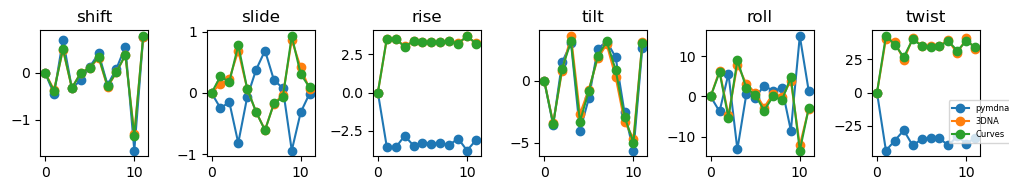

In [7]:
fig,ax = plt.subplots(1,6, figsize=[10,2])
ax = ax.flatten()

for _,name in enumerate(names[6:]):
    

    para = params[:,:,names.index(name)]
    ref_para = ref[:,:,names.index(name)]
    
    # if _ in [5,6,7,8,10,11]:
    #     ax[_].plot(np.mean(para, axis=0)[::-1],'-o')
    # elif _ == 9:
    #     ax[_].plot(-np.mean(para, axis=0)[::-1],'-o')
    # else:
    #     ax[_].plot(np.mean(para, axis=0),'-o')
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].plot(np.mean(ref_para, axis=0),'-o')
    ax[_].set_title(name)



step = np.loadtxt('./output/step.dat')
print(step.shape)
extra_column = np.zeros((1, 8))
step = np.concatenate((extra_column,step), axis=0)
for i in range(0, 6):
    param = step[:, i]
    ax[i].plot(param, '-o')


fig.legend(['pymdna', '3DNA','Curves'], loc=[0.94,0.25],fontsize=6)
fig.tight_layout()

(12, 8)


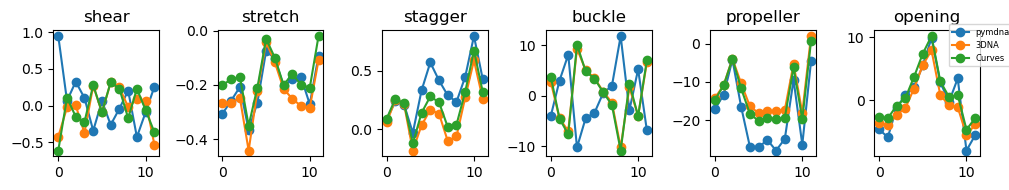

In [8]:
fig,ax = plt.subplots(1,6, figsize=[10,2])
ax = ax.flatten()

for _,name in enumerate(names[:6]):
    

    para = params[:,:,names.index(name)]
    ref_para = ref[:,:,names.index(name)]
    
    # if _ in [5,6,7,8,10,11]:
    #     ax[_].plot(np.mean(para, axis=0)[::-1],'-o')
    # elif _ == 9:
    #     ax[_].plot(-np.mean(para, axis=0)[::-1],'-o')
    # else:
    #     ax[_].plot(np.mean(para, axis=0),'-o')
    ax[_].plot(np.mean(para, axis=0),'-o')    
    ax[_].plot(np.mean(ref_para, axis=0),'-o')
    ax[_].set_title(name)



pair = np.loadtxt('./output/pair.dat')
print(step.shape)

for i in range(0, 6):
    param = pair[:, i]
    ax[i].plot(param, '-o')


fig.legend(['pymdna', '3DNA','Curves'], loc=[0.94,0.65],fontsize=6)
fig.tight_layout()